In [33]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline
import sys
sys.path.append('../')
import scriptinit
import numpy as np
import numpy.random as npr
import numpy.linalg as npla
from matplotlib.pyplot import *
from pyrl.algorithms.uvfa import *
from pyrl.algorithms.valueiter import *
from pyrl.tasks.gridworld import *
from pyrl.algorithms.nn import *
from pyrl.agents.agent import *
from pyrl.agents.multitask import *
from pyrl.algorithms.multitask import *
import pyrl.agents.arch as arch
from pyrl.prob import *
from pyrl.utils import *
from pyrl.evaluate import *

In [13]:
def showV(v):
    imshow(v.reshape(H, W), interpolation='none')
    print v
    
def showExperience(agent):
    task_types = set(agent.experience_task)
    task_percent = dict()
    for task in task_types:
        task_percent[task] = sum([e == task for e in agent.experience_task])
#     total = sum(task_percent.values())
    total = 1.
    return {key: val / float(total) for (key, val) in task_percent.items()}

[[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.
   0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.
   0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.
   0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.
   0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.
   0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.
   0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.
   0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.
   0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.
   0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.
   0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.  0.]
 [ 0.  0.  0.  0.  0.

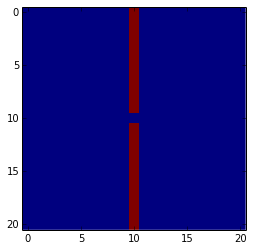

In [14]:
# world 1
H = W = 21
world = np.zeros((H, W))
world[:10, 10] = 1
world[11:, 10] = 1
showV(world)

In [59]:
grid = Grid(world, action_stoch=0.2)
goal = {(20,20): 1.}
task = GridWorldUltimateFixedStart(0, grid_env=grid, goal=goal, demons={}, rewards=goal, wall_penalty=0., gamma=0.95)

In [60]:
dqn_arch = lambda states: arch.two_layer(states, H * W * 2, 32, 4)

4.06151440722e-28
4.06151440722e-28
1.80443331277e-22
1.08330820436e-13
0.0
1.74191143776e-19
1.38737316278e-17
5.2414141633e-17
0.0
0.0
0.0
0.0
0.0
0.0
1.75758988849e-16
1.61612462267e-11
4.06748577237e-12
1.53818297376e-14
4.5482391134e-17
2.23983255401e-18


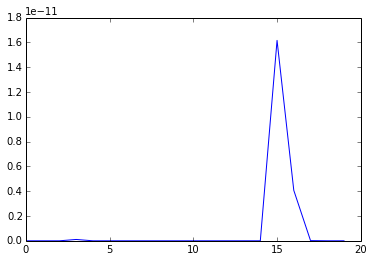

In [61]:
dqn = DQN(task, dqn_arch)
learner = DeepQlearn(task, dqn, lr=1e-4, memory_size=250)
performance = []
for it in range(20):
    learner.run(budget = 100)
    performance.append(reward_tabular_normalized_fix_start(dqn, task, tol=1e-4))
    print performance[-1]
plot(performance)

In [62]:
grid = Grid(world, action_stoch=0.2)
goal = {(10,11): 1.}
task1 = GridWorldUltimateFixedStart(task.env.state_id[(10,9)], grid_env=grid, goal=goal, demons={}, rewards=goal, wall_penalty=0., gamma=0.95)

In [63]:
dqn_mt = DQN(task1, dqn_arch)
learner_mt = DeepQlearn(task, dqn_mt, lr=1e-4, memory_size=250)

0.451201401385
0.451201401385
0.46086293708
0.458688615979
0.460086677342
0.459981181394
0.458550012182
0.457895098427
0.457689075775
0.459861899211
0.460041410836
0.460049827736
0.460281168106
0.459365730278
0.459348850013
0.459348850631
0.459427458604
0.460094901591
0.441877085416
0.440244946531


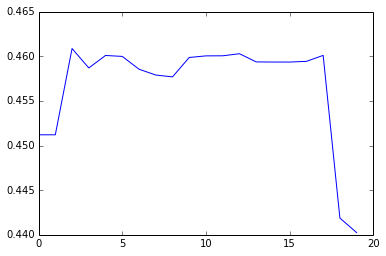

In [64]:
performance = []
for it in range(20):
    learner_mt.run(budget = 100)
    performance.append(reward_tabular_normalized_fix_start(dqn_mt, task1, tol=1e-4))
    print performance[-1]
plot(performance)

## Difficult of task w.r.t. distance from the hole.

In this example, we can observe that being farther away from the hole means harder to get right into it.

In [65]:
grid = Grid(world, action_stoch=0.2)
goal = {(10,11): 1.}
for i in range(20):
    task_i = GridWorldUltimateFixedStart(task.env.state_id[(i,9)], grid_env=grid, goal=goal, demons={}, rewards=goal, wall_penalty=0., gamma=0.95)
    dqn_mt.task = task_i
    learner_mt.task = task_i
    learner_mt.run(budget = 100)
    performance = reward_tabular_normalized_fix_start(dqn_mt, task_i, tol=1e-4)
    print performance


0.00515924512829
0.000116722107275
0.000377190115479
7.15399724304e-06
0.000385706891792
0.000144781403246
0.0887368822042
0.0426899030363
0.096648682541
0.145817251345
0.420403497976
0.468199419459
0.433450177595
0.0743022799267
0.0979801789308
0.124563505524
0.00828611192342
0.0658386458309
0.0332795232594
0.216557513453


Even with fully connected networks that do not have generalization ability, it is still useful to train with easier tasks first. 

Because this make bootstrapping easier.

In [66]:
grid = Grid(world, action_stoch=0.2)
goal = {(10,11): 1.}

dqn_mt = DQN(task1, dqn_arch)
learner_mt = DeepQlearn(task, dqn_mt, lr=1e-4, memory_size=250)
for i in range(11, -1, -1):
    for it in range(3):
        task_i = GridWorldUltimateFixedStart(task.env.state_id[(i,9)], grid_env=grid, goal=goal, demons={}, rewards=goal, wall_penalty=0., gamma=0.95)
        dqn_mt.task = task_i
        learner_mt.task = task_i
        learner_mt.run(budget = 100)
        performance = reward_tabular_normalized_fix_start(dqn_mt, task_i, tol=1e-4)
        print 'i = ', i, 'performance = ', performance

i =  11 performance =  0.408028701272
i =  11 performance =  0.408028701272
i =  11 performance =  0.00816149555619
i =  10 performance =  0.421364067567
i =  10 performance =  0.438708170271
i =  10 performance =  0.445267000171
i =  9 performance =  0.432860995574
i =  9 performance =  0.456296204791
i =  9 performance =  0.459983514749
i =  8 performance =  0.192763813629
i =  8 performance =  0.249550906919
i =  8 performance =  0.334881611101
i =  7 performance =  0.365420341184
i =  7 performance =  0.355968351452
i =  7 performance =  0.356653092565
i =  6 performance =  0.372846961158
i =  6 performance =  0.328522864996
i =  6 performance =  0.0284117095085
i =  5 performance =  0.13672636454
i =  5 performance =  0.115359795997
i =  5 performance =  0.0127523853288
i =  4 performance =  0.200281513505
i =  4 performance =  0.663512377201
i =  4 performance =  0.512006869746
i =  3 performance =  0.18115883957
i =  3 performance =  0.0727880735555
i =  3 performance =  0.17830

In [67]:
grid = Grid(world, action_stoch=0.2)
goal = {(10,11): 1.}

dqn_mt = DQN(task1, dqn_arch)
learner_mt = DeepQlearn(task, dqn_mt, lr=1e-4, memory_size=250)
for ii in range(11, -1, -1):
    i = 0
    for it in range(3):
        task_i = GridWorldUltimateFixedStart(task.env.state_id[(i,9)], grid_env=grid, goal=goal, demons={}, rewards=goal, wall_penalty=0., gamma=0.95)
        dqn_mt.task = task_i
        learner_mt.task = task_i
        learner_mt.run(budget = 100)
        performance = reward_tabular_normalized_fix_start(dqn_mt, task_i, tol=1e-4)
        print 'i = ', i, 'performance = ', performance

i =  0 performance =  2.6650376348e-13
i =  0 performance =  2.6650376348e-13
i =  0 performance =  1.42093413768e-06
i =  0 performance =  1.90614956147e-08
i =  0 performance =  3.84980449453e-08
i =  0 performance =  0.000154941602245
i =  0 performance =  2.62516773108e-09
i =  0 performance =  1.0886161817e-06
i =  0 performance =  2.67390439566e-06
i =  0 performance =  2.26034805004e-06
i =  0 performance =  1.32074686152e-07
i =  0 performance =  7.35309603572e-07
i =  0 performance =  1.1167386403e-07
i =  0 performance =  2.17192561522e-07
i =  0 performance =  9.9716435138e-09
i =  0 performance =  5.71919159248e-08
i =  0 performance =  5.76633691196e-07
i =  0 performance =  4.6879279297e-07
i =  0 performance =  4.51668425687e-07
i =  0 performance =  3.78106823775e-07
i =  0 performance =  8.12056651843e-07
i =  0 performance =  5.30083348746e-06
i =  0 performance =  6.88846747114e-08
i =  0 performance =  6.04198266881e-07
i =  0 performance =  6.4792776421e-06
i =  0 

For $i = 0,1,...,10$, the difficulty decreases with $i$.

The above comparison shows that training with easier tasks help reward boostraping. 